# Question 2:
In this question we are going to classify data stored in perceptron.csv using a neuron and perceptron rule.
Our dataset consists of 3 columns in which the first 2 are features and the last one shows class of each datapoint.

First of all, we import required libraries:

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Now, we read data from the csv file.

In [139]:
data = np.genfromtxt("perceptron.csv", delimiter = ",")
data = data[1:]

In [140]:
data

array([[ 1.02850287,  0.97321756, -1.        ],
       [ 0.2525051 ,  0.95587152, -1.        ],
       [ 1.50808537,  0.672058  , -1.        ],
       ...,
       [-0.4651142 , -1.29082989,  1.        ],
       [ 1.52205548,  0.9480073 , -1.        ],
       [ 0.83411829,  0.92671017, -1.        ]])

In [141]:
len(data)

400

1 - first of all, we plot the scatterplot of data and separate datapoints using 2 colors regarding their class.

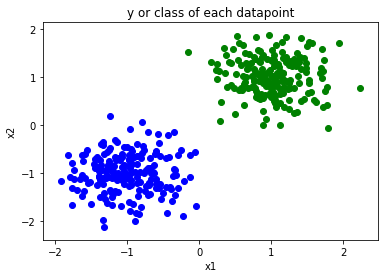

In [206]:
for i in range(len(data)):
    datapoint = data[i]
    if datapoint[2] == 1:
        plt.scatter(datapoint[0], datapoint[1], c = "blue")
    elif datapoint[2] == -1:
        plt.scatter(datapoint[0], datapoint[1], c = "green")
    plt.title('y or class of each datapoint')
    plt.xlabel('x1')
    plt.ylabel('x2')

2 - Now, we are going to define a neuron using perceptron rule and desired threshold. First part is to define activation function:

In [207]:
def activation(x, theta):
    if (x > theta):
        return 1
    elif (x < -theta):
        return -1
    else:
        return 0

Now is the time to define variables that need default value. I defined both weights and bias equal to zero and after experimenting several learning rates, I chose 0.2 for it. I chose 0.1 for the threshold too.

In [224]:
learning_rate = 0.2
w1 = 0
w2 = 0
b = 0
theta = 0.1

Now, we split the dataset into train and test. There are 400 rows meaning that with 0.75 reserved for train data, 100 rows will be treated as test and 300 rows will be train data.

In [225]:
x_train, x_test = train_test_split(data, test_size = 0.25, random_state = 13)

The next step is to perform the updates in each epoch. The number of pochs I chose is 10 but only one epoch will result 100 percent accuracy too. The rest of the code is the implementation of the perceptron updating rule thaught in the class.

In [226]:
for epoch in range(10):
    for i in range(len(x_train)):
        x = x_train[i]
        net = x[0] * w1 + x[1] * w2 + b
        y = activation(net, theta)
        if x[2] != y:
            b = b + learning_rate * x[2]
            w1 = w1 + learning_rate * x[2] * x[0]
            w2 = w2 + learning_rate * x[2] * x[1]

3 - Now, we define a function to predict the test data and we count number of test points that we have correctly classified.

In [227]:
def predict(x1, x2, theta):
    z = x1 * w1 + x2 * w2 + b
    return activation(z, theta)

In [228]:
correct = 0
for i in range(len(x_test)):
    test = x_test[i] 
    predicted = predict(test[0], test[1], theta)
    if test[2] == predicted:
        correct += 1

We have achieved an accuracy of 100 percent.

In [229]:
print("Accuracy : %d%%" % (correct / len(x_test) * 100))

Accuracy : 100%


Now we plot the scatterplot of the predicted classes of each datapoint and the lines that classify them. Since we have achieved 100 percent accuracy the scatterplots of this part is the same as the first part.

Text(0, 0.5, 'x2')

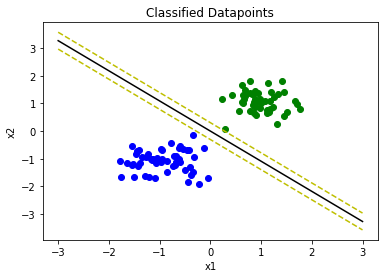

In [230]:
for i in range(len(x_test)):
    datapoint = x_test[i]
    if predict(datapoint[0], datapoint[1], theta) == 1:
        plt.scatter(datapoint[0], datapoint[1], c = "blue")
    elif predict(datapoint[0], datapoint[1], theta) == -1:
        plt.scatter(datapoint[0], datapoint[1], c = "green")
    else:
        plt.scatter(datapoint[0], datapoint[1], c = "black")

x = np.linspace(-3, 3, 100)
y = ((-w1 * x) - b) / w2
y1 = ((-w1 * x) - (b + theta)) / w2
y2 = ((-w1 * x) - (b - theta)) / w2
plt.title('Classified Datapoints')
plt.plot(x, y, c = 'black')
plt.plot(x, y1, 'y--')
plt.plot(x, y2, 'y--')
plt.xlabel('x1')
plt.ylabel('x2')

4 - In the last part we rerun second and third part of this question using another threshold.

In [231]:
learning_rate = 0.2
w1 = 0
w2 = 0
b = 0
theta = 200

In [232]:
for epoch in range(10):
    for i in range(len(x_train)):
        x = x_train[i]
        net = x[0] * w1 + x[1] * w2 + b
        y = activation(net, theta)
        if x[2] != y:
            b = b + learning_rate * x[2]
            w1 = w1 + learning_rate * x[2] * x[0]
            w2 = w2 + learning_rate * x[2] * x[1]

In [233]:
correct = 0
for i in range(len(x_test)):
    test = x_test[i] 
    predicted = predict(test[0], test[1], theta)
    if test[2] == predicted:
        correct += 1

In [234]:
print("Accuracy : %d%%" % (correct / len(x_test) * 100))

Accuracy : 89%


Text(0, 0.5, 'x2')

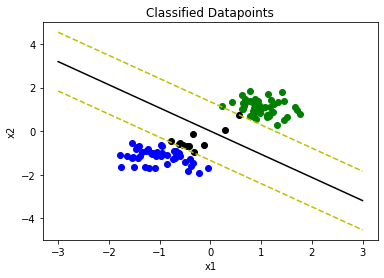

In [235]:
for i in range(len(x_test)):
    datapoint = x_test[i]
    if predict(datapoint[0], datapoint[1], theta) == 1:
        plt.scatter(datapoint[0], datapoint[1], c = "blue")
    elif predict(datapoint[0], datapoint[1], theta) == -1:
        plt.scatter(datapoint[0], datapoint[1], c = "green")
    else:
        plt.scatter(datapoint[0], datapoint[1], c = "black")

x = np.linspace(-3, 3, 100)
y = ((-w1 * x) - b) / w2
y1 = ((-w1 * x) - (b + theta)) / w2
y2 = ((-w1 * x) - (b - theta)) / w2
plt.title('Classified Datapoints')
plt.plot(x, y, c = 'black')
plt.plot(x, y1, 'y--')
plt.plot(x, y2, 'y--')
plt.xlabel('x1')
plt.ylabel('x2')

We can see that the accuracy is lower with the new threshold and few datapoints have been falsely labeled.

Text(0, 0.5, 'x2')

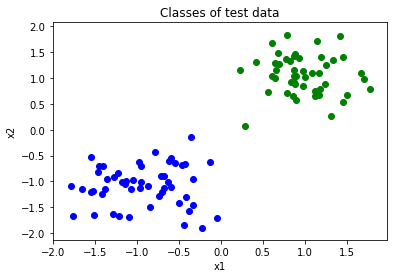

In [238]:
for i in range(len(x_test)):
    datapoint = x_test[i]
    if datapoint[2] == 1:
        plt.scatter(datapoint[0], datapoint[1], c = "blue")
    elif datapoint[2] == -1:
        plt.scatter(datapoint[0], datapoint[1], c = "green")
plt.title('Classes of test data')
plt.xlabel('x1')
plt.ylabel('x2')